In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ucimlrepo import fetch_ucirepo 

# Fetching data

In [78]:
iris = fetch_ucirepo(id=53) 
  
X = iris.data.features 
y = iris.data.targets 


# Utils, plotting

In [19]:
def read_dataset(path):
    df = pd.read_csv(path)
    return df

def plot(title, x1, y1, label1 = None, title1 = None, 
         x2 = None, 
         y2 = None, 
         x3 = None,
         y3 = None,
         label2 = None,
         label3 = None,
         title2 = None,
         mode1 = 'yo',
         mode2 = 'g^',
        mode3 = 'r+'):
    
    plt.plot(x1, y1, mode1, label = label1 if label1 is not None else '')
    if x2 is not None and y2 is not None:
        plt.plot(x2, y2, mode2, label = label2 if label2 is not None else '')
    if x3 is not None and y2 is not None:
        plt.plot(x3, y3, mode3, label = label3 if label3 is not None else '')
          
    plt.title(title)
    plt.xlabel(title1 if title1 is not None else '')
    plt.ylabel(title2 if title2 is not None else '')
    
    plt.legend()
    plt.show()
    
def train_test_split(set1, set2, test_size, random_state=21):
    np.random.seed(random_state)
    indices = np.arange(len(set1))
    np.random.shuffle(indices)
    
    test_size = int(test_size * len(set1))
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    
    if isinstance(set1, pd.DataFrame):
        x_train = set1.iloc[train_indices]
        x_test = set1.iloc[test_indices]
    else:
        x_train = set1[train_indices]
        x_test = set1[test_indices]

    y_train = set2[train_indices]
    y_test = set2[test_indices]
    
    return x_train, x_test, y_train, y_test

    
def normalisation(x_train__, x_test__):
    if isinstance(x_train__, pd.DataFrame):
        x_train__ = x_train__.values.tolist()
    if isinstance(x_test__, pd.DataFrame):
        x_test__ = x_test__.values.tolist()
    if isinstance(x_train__[0], float) or len(x_train__[0]) == 1:
        xmin = min(x_train__)
        xmax = max(x_train__)
        return ([(value - xmin) / (xmax - xmin) for value in x_train__],
                [(value - xmin) / (xmax - xmin) for value in x_test__], [xmin, xmax])
    
    if len(x_train__[0]) == 2:
        x_train__1 = [x[0] for x in x_train__]
        x_train__2 = [x[1] for x in x_train__]
        x_test__1 = [x[0] for x in x_test__]
        x_test__2 = [x[1] for x in x_test__]
        
        x_train_norm1, x_test_norm1, min_max1 = normalisation(x_train__1, x_test__1)
        x_train_norm2, x_test_norm2, min_max2 = normalisation(x_train__2, x_test__2)
        return list(zip(x_train_norm1, x_train_norm2)), list(zip(x_test_norm1, x_test_norm2)), [min_max1, min_max2]

# Logistic Regressor - soft max

In [79]:
label_map = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
label_map_reverse = {0: "Iris-setosa", 1: "Iris-versicolor", 2: "Iris-virginica"}

class LogisticRegression:
    def __init__(self, max_iter=100, rate=0.001):
        self.coef = None
        self.bias = None
        self.max_iter = max_iter
        self.rate = rate

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def predict_proba(self, x):
        x = np.array(x)
        logits = np.dot(x, self.coef) + self.bias
        return self.softmax(logits)

    def fit(self, x, y_):
        x = np.array(x)
        y_ = np.array(y_)
        n_samples, n_features = x.shape
        n_labels = len(np.unique(y_))   
        y_onehot = np.eye(n_labels)[y_] 
        
        self.coef = np.random.randn(n_features, n_labels)
        self.bias = np.zeros((1, n_labels))

        for _ in range(self.max_iter):
            logits = np.dot(x, self.coef) + self.bias
            probs = self.softmax(logits)                  
            error = probs - y_onehot 
            
            grad_w = np.dot(x.T, error) / n_samples        
            grad_b = np.mean(error, axis=0, keepdims=True) 
            
            self.coef -= self.rate * grad_w             
            self.bias -= self.rate * grad_b

    def predict(self, x):
        probs = self.predict_proba(x)                  
        return np.argmax(probs, axis=1)

# Data

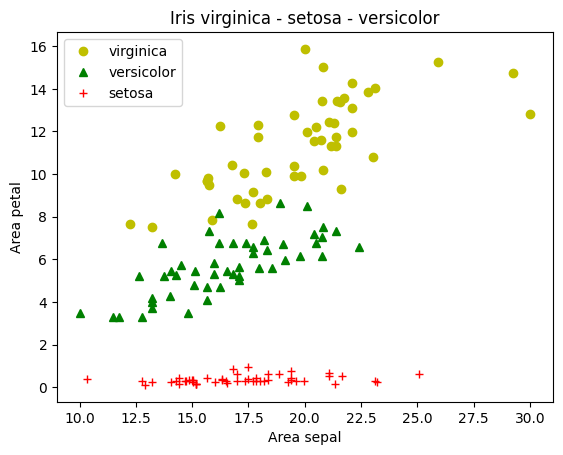

In [80]:
area_sepal = [ (a * b) for (a, b) in zip(X['sepal length'], X['sepal width'])]
area_petal = [ (a * b) for (a, b) in zip(X['petal length'], X['petal width'])]

area_sepal = list(area_sepal)
area_petal = list(area_petal)
y = y.values


plot(title = 'Iris virginica - setosa - versicolor',
     x1=[area_sepal[i] for i in range(len(y)) if y[i] == 'Iris-virginica'], 
     y1=[area_petal[i] for i in range(len(y)) if y[i] == 'Iris-virginica'], 
     label1='virginica',
     x2=[area_sepal[i] for i in range(len(y)) if y[i] == 'Iris-versicolor'], 
     y2=[area_petal[i] for i in range(len(y)) if y[i] == 'Iris-versicolor'], 
     label2='versicolor',
     x3=[area_sepal[i] for i in range(len(y)) if y[i] == 'Iris-setosa'], 
     y3=[area_petal[i] for i in range(len(y)) if y[i] == 'Iris-setosa'], 
     label3='setosa',
     title1='Area sepal', title2='Area petal')


# Train test split

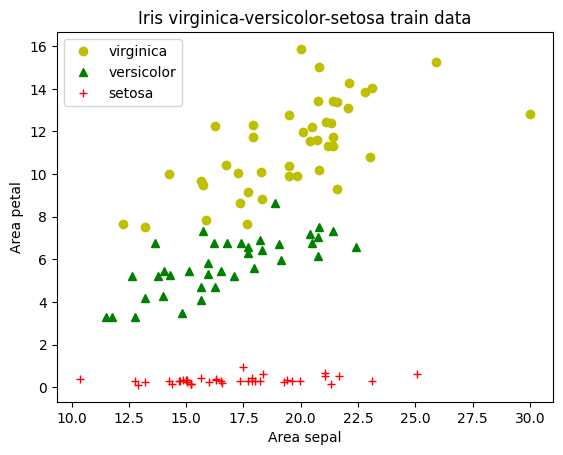

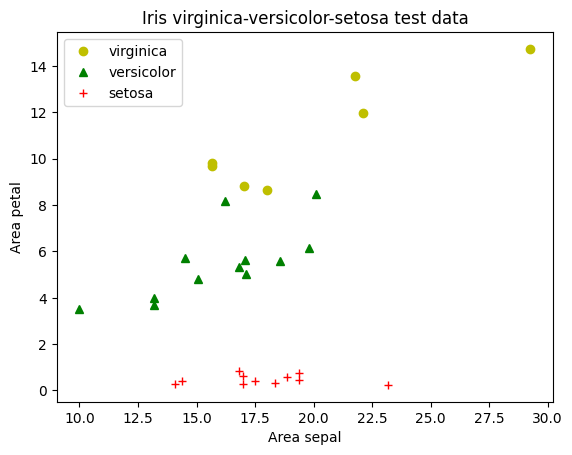

In [85]:
area_sepal_df = pd.Series(area_sepal, name='area_sepal')
area_petal_df = pd.Series(area_petal, name='area_petal')
data_df = pd.concat([area_sepal_df, area_petal_df], axis=1)


x_train, x_test, y_train, y_test = train_test_split(data_df, y, test_size=0.2, random_state=21)

def plot_data(x, y, title):
    area_sepal_train, area_petal_train = zip(*x[['area_sepal', 'area_petal']].values)

    
    plot(title = title,
         x1=[area_sepal_train[i] for i in range(len(y)) if y[i] == 'Iris-virginica'], 
         y1=[area_petal_train[i] for i in range(len(y)) if y[i] == 'Iris-virginica'], 
         label1='virginica',
         x2=[area_sepal_train[i] for i in range(len(y)) if y[i] == 'Iris-versicolor'], 
         y2=[area_petal_train[i] for i in range(len(y)) if y[i] == 'Iris-versicolor'], 
         label2='versicolor',
         x3=[area_sepal_train[i] for i in range(len(y)) if y[i] == 'Iris-setosa'], 
         y3=[area_petal_train[i] for i in range(len(y)) if y[i] == 'Iris-setosa'], 
         label3='setosa',
         title1='Area sepal', title2='Area petal')

    
plot_data(x_train, y_train, 'Iris virginica-versicolor-setosa train data')
plot_data(x_test, y_test, 'Iris virginica-versicolor-setosa test data')

# Data normalisation

In [86]:
x_train_norm, x_test_norm, min_max_list = normalisation(x_train, x_test)

# Model training

In [90]:
y_train_numeric = np.array([label_map[label.item()] for label in y_train])

model = LogisticRegression()
model.fit(x_train_norm, y_train_numeric)

w0 = model.bias
w1 = model.coef[0]
w2 = model.coef[1]

area_sepal_train, area_petal_train = zip(*x_train_norm)
area_sepal_train = np.array(area_sepal_train)
area_petal_train = np.array(area_petal_train)

# Predicted vs actual

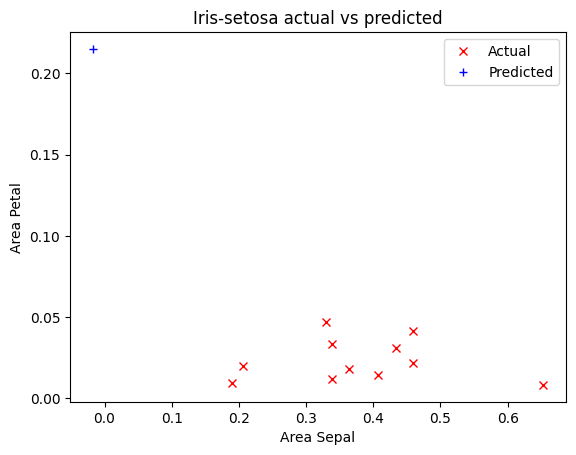

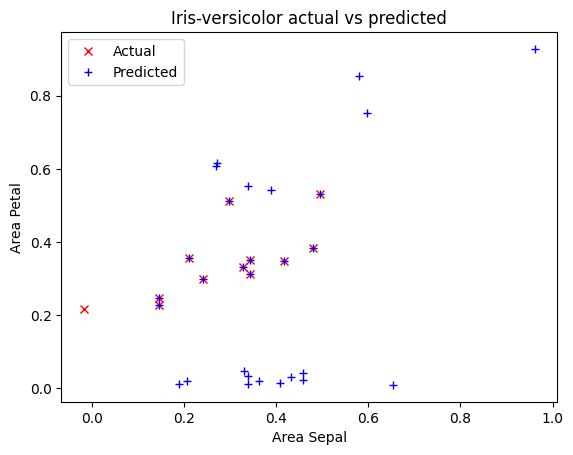

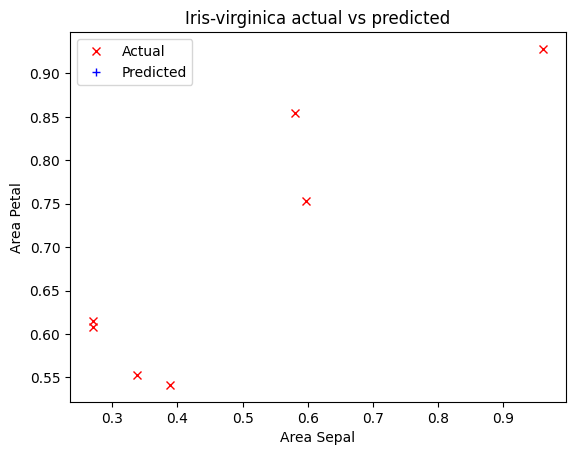

In [92]:
y_predict = model.predict(x_test_norm)

area_sepal_test, area_petal_test = zip(*x_test_norm)

area_sepal_test = list(area_sepal_test)
area_petal_test = list(area_petal_test)
y_test = list(y_test)
y_predict = list([label_map_reverse[label] for label in y_predict])

plot(title='Iris-setosa actual vs predicted',
    x1=[area_sepal_test[i] for i in range(len(y_test)) if y_test[i] == 'Iris-setosa'],
    y1=[area_petal_test[i] for i in range(len(y_test)) if y_test[i] == 'Iris-setosa'],
    label1='Actual',
    x2=[area_sepal_test[i] for i in range(len(y_test)) if y_predict[i] == 'Iris-setosa'],
    y2=[area_petal_test[i] for i in range(len(y_test)) if y_predict[i] == 'Iris-setosa'],
    label2='Predicted',
    title1='Area Sepal',
    title2='Area Petal',
    mode1='rx',
    mode2='b+')

plot(title='Iris-versicolor actual vs predicted',
    x1=[area_sepal_test[i] for i in range(len(y_test)) if y_test[i] == 'Iris-versicolor'],
    y1=[area_petal_test[i] for i in range(len(y_test)) if y_test[i] == 'Iris-versicolor'],
    label1='Actual',
    x2=[area_sepal_test[i] for i in range(len(y_test)) if y_predict[i] == 'Iris-versicolor'],
    y2=[area_petal_test[i] for i in range(len(y_test)) if y_predict[i] == 'Iris-versicolor'],
    label2='Predicted',
    title1='Area Sepal',
    title2='Area Petal',
    mode1='rx',
    mode2='b+')

plot(title='Iris-virginica actual vs predicted',
    x1=[area_sepal_test[i] for i in range(len(y_test)) if y_test[i] == 'Iris-virginica'],
    y1=[area_petal_test[i] for i in range(len(y_test)) if y_test[i] == 'Iris-virginica'],
    label1='Actual',
    x2=[area_sepal_test[i] for i in range(len(y_test)) if y_predict[i] == 'Iris-virginica'],
    y2=[area_petal_test[i] for i in range(len(y_test)) if y_predict[i] == 'Iris-virginica'],
    label2='Predicted',
    title1='Area Sepal',
    title2='Area Petal',
    mode1='rx',
    mode2='b+')

# Sepal = 5.35cm x 3.85cm Petal = 1.25cm X 0.4cm

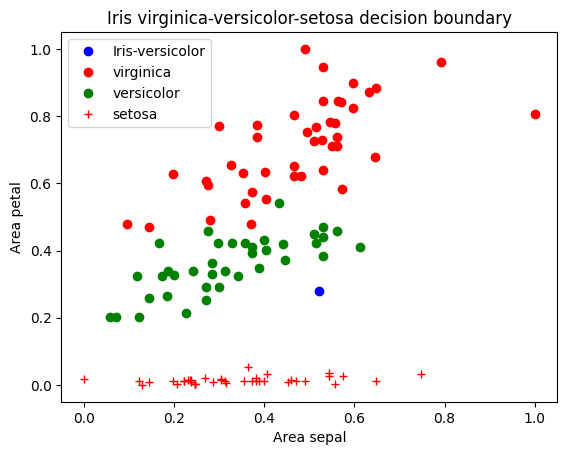

In [96]:
new_x_test = [[5.35 * 3.85, 11.25 * 0.4]]
area_sepal_min_max, area_petal_min_max = min_max_list[0], min_max_list[1]

normalised_new_x_test = [[(x[0] - area_sepal_min_max[0])/ (area_sepal_min_max[1] - area_sepal_min_max[0]),
                          (x[1] - area_petal_min_max[0]) / (area_petal_min_max[1] - area_petal_min_max[0])] for x in new_x_test ]

new_y_test = model.predict(normalised_new_x_test)

plt.plot(normalised_new_x_test[0][0], normalised_new_x_test[0][1], 'bo', label=label_map_reverse[new_y_test.item()])
plt.legend()

plot(title='Iris virginica-versicolor-setosa decision boundary',
    x1=[area_sepal_train[i] for i in range(len(y_train)) if y_train[i] == 'Iris-virginica'], 
    y1=[area_petal_train[i] for i in range(len(y_train)) if y_train[i] == 'Iris-virginica'], 
    label1='virginica',
    x2=[area_sepal_train[i] for i in range(len(y_train)) if y_train[i] == 'Iris-versicolor'], 
    y2=[area_petal_train[i] for i in range(len(y_train)) if y_train[i] == 'Iris-versicolor'], 
    label2='versicolor',
    title1='Area sepal',
    title2='Area petal',
    x3=[area_sepal_train[i] for i in range(len(y_train)) if y_train[i] == 'Iris-setosa'], 
    y3=[area_petal_train[i] for i in range(len(y_train)) if y_train[i] == 'Iris-setosa'],
    label3 = 'setosa',
    mode1='ro',
    mode2='go')